In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras.layers import Dense

For this project, dailyActivity_merged is the data file that comprises the most different features, some of the other files were merged to get this dataset, so the focus is on this data file  

In [2]:
dailyact_df= pd.read_csv('C:/Users/hp/OneDrive/Desktop/archive (2)/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
dailyact_df.head(20)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,04/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [3]:
dailyact_df.shape

(940, 15)

There are 940 rows in the dataset and 15 columns

DATA WRANGLING

In [4]:
dailyact_df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

No null data in the dataset

In [5]:
dailyact_df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [6]:
# Id column's data type should be object therefore update the column's data type
dailyact_df['Id']= dailyact_df['Id'].astype(str)

In [7]:
dailyact_df.dtypes

Id                           object
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [8]:
dailyact_df['Id'].nunique()

33

In [9]:
dailyact_df['Id'].value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [38]:
#Remove the records of the patient with Id= 4057192912
dailyact_df = dailyact_df.drop(dailyact_df[dailyact_df['Id'] == '4057192912'].index)

In [39]:
dailyact_df['Id'].value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
1624580081    31
4445114986    31
4388161847    31
4558609924    31
4020332650    31
2026352035    31
1844505072    31
1927972279    31
2022484408    31
8877689391    31
2320127002    31
2873212765    31
5577150313    30
3977333714    30
1644430081    30
6290855005    29
8792009665    29
6117666160    28
7007744171    26
6775888955    26
3372868164    20
8253242879    19
2347167796    18
Name: count, dtype: int64

## Exploratory Data Analysis

Explore the relationship between Total Distance and Calories

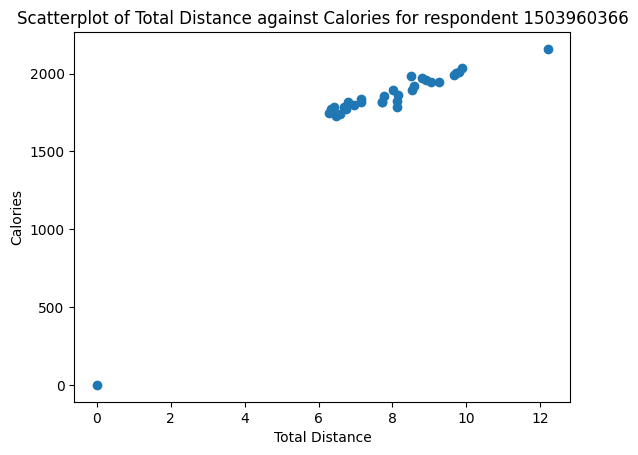

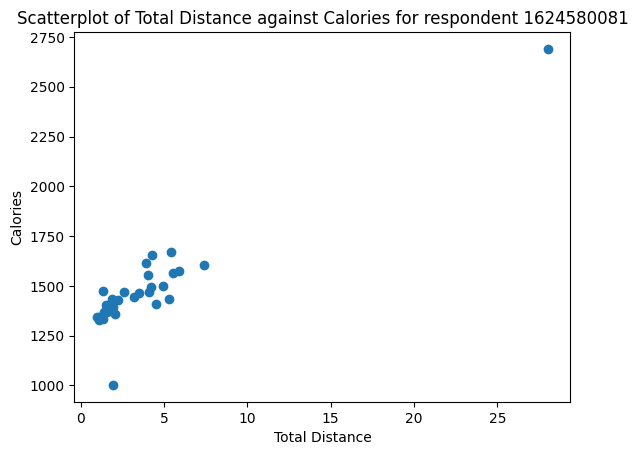

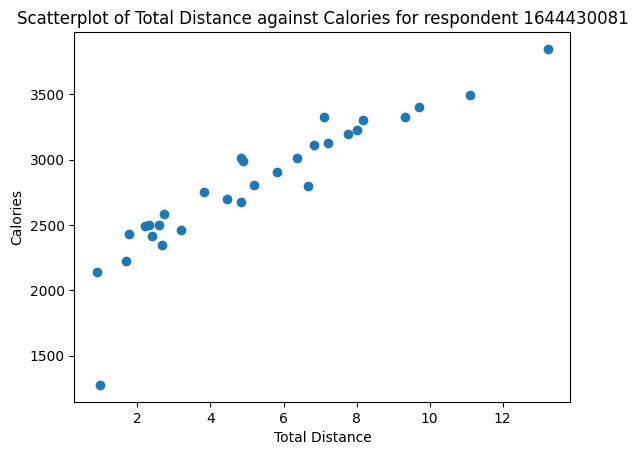

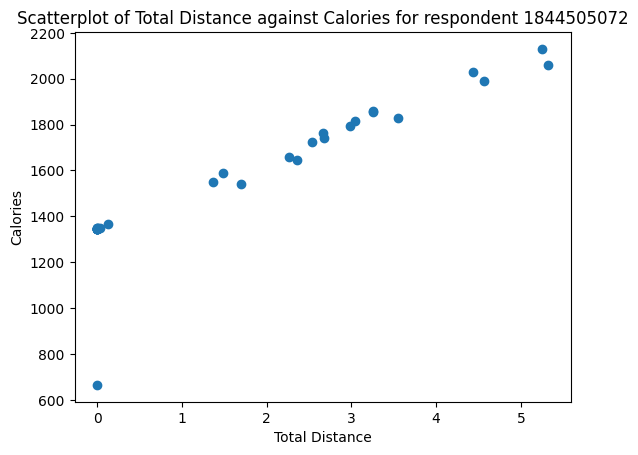

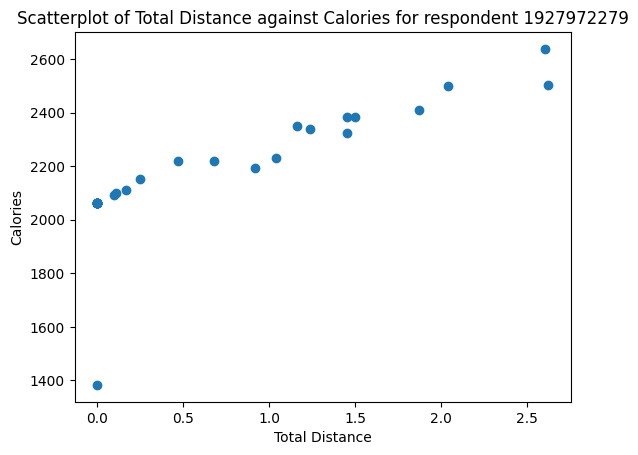

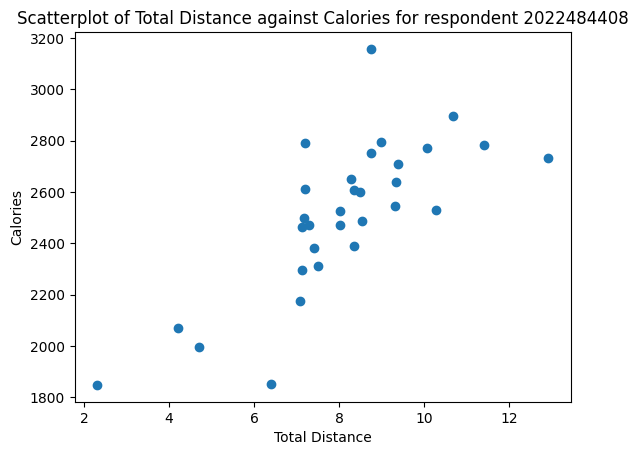

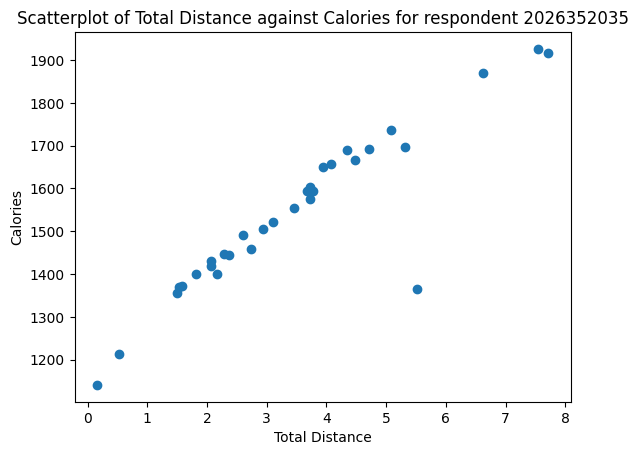

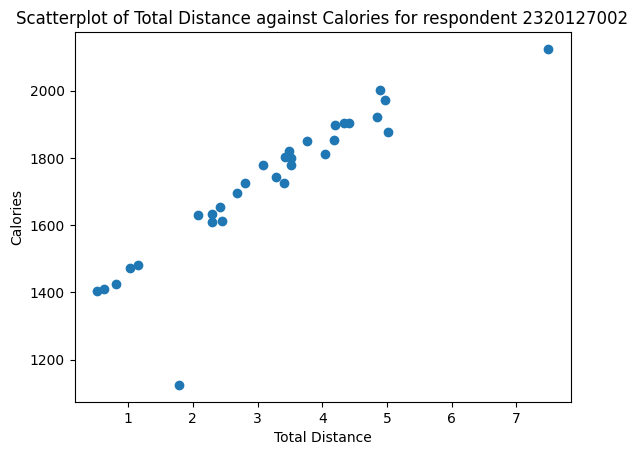

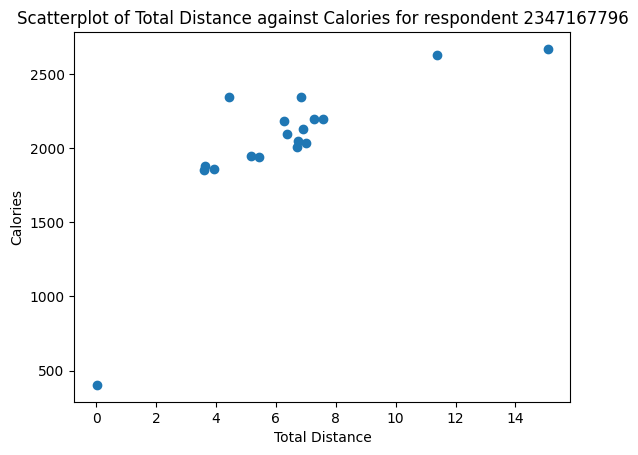

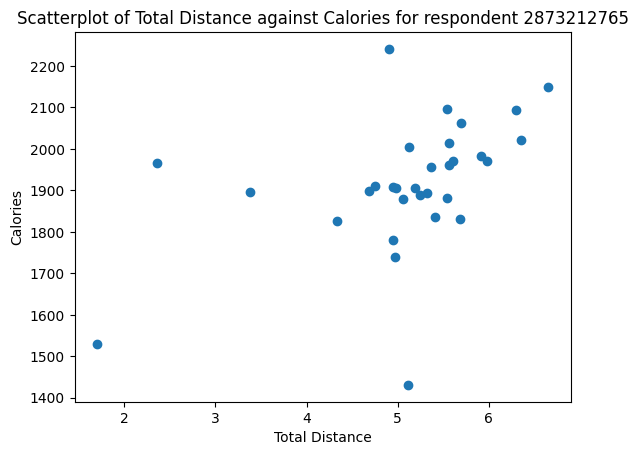

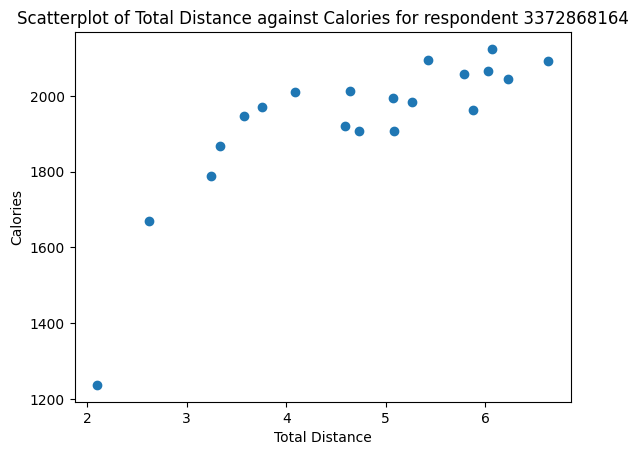

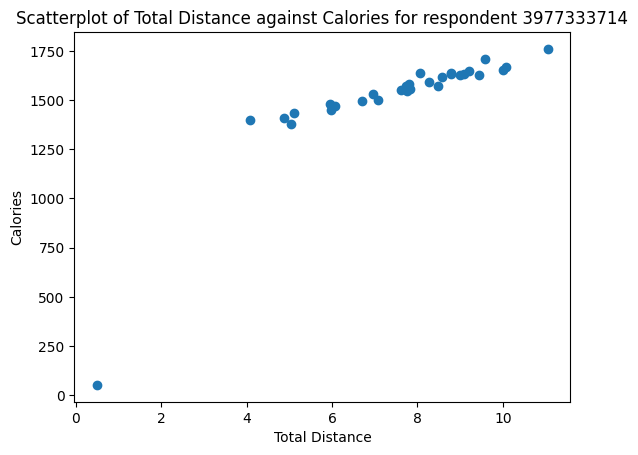

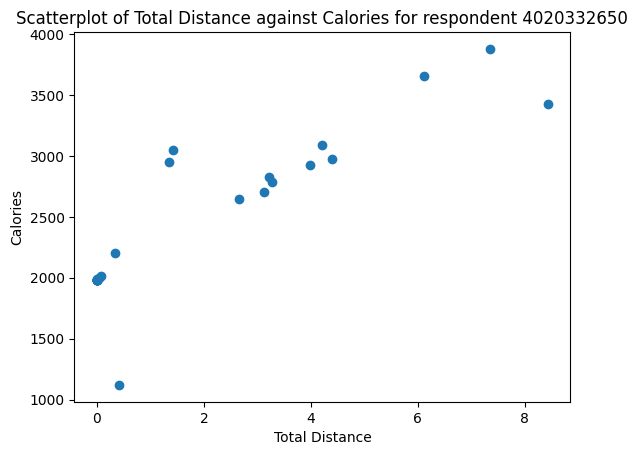

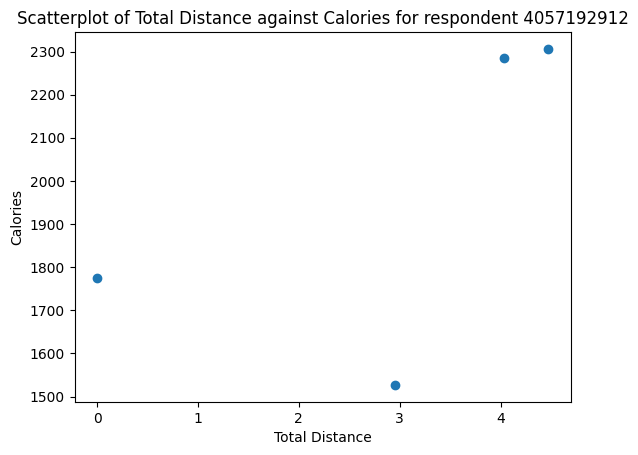

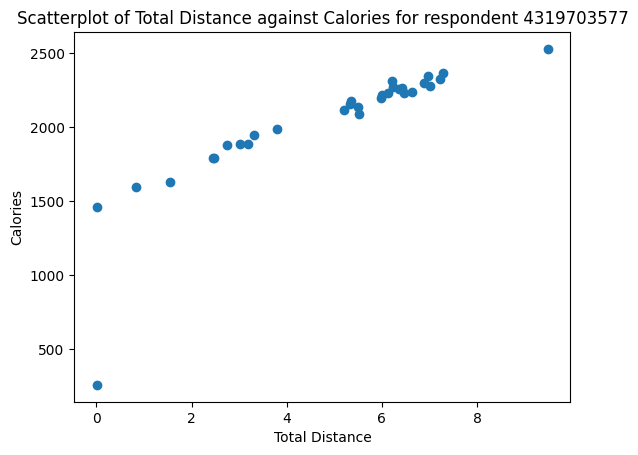

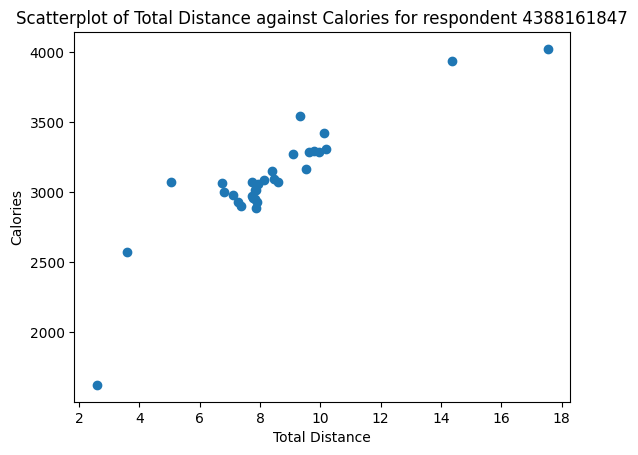

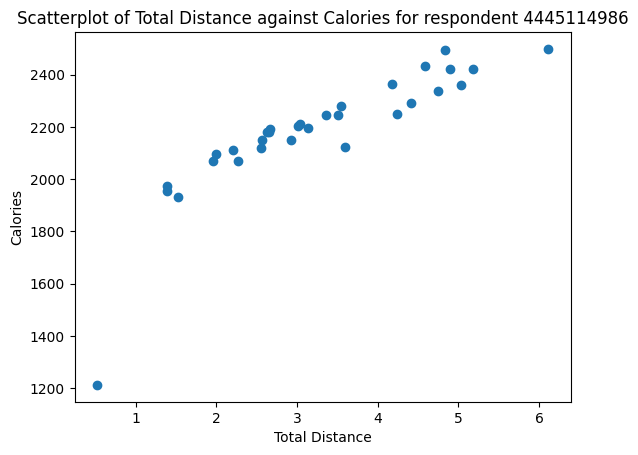

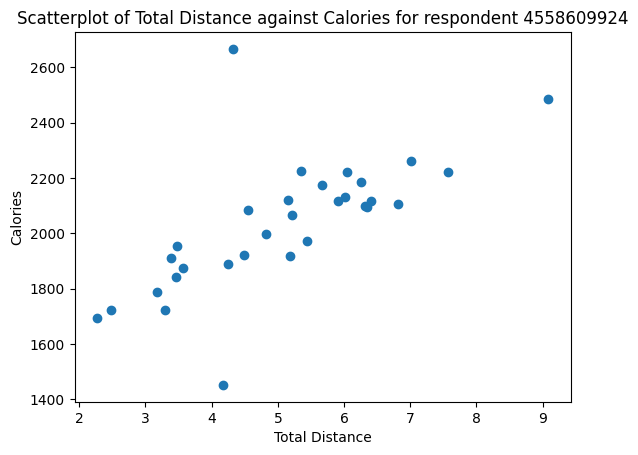

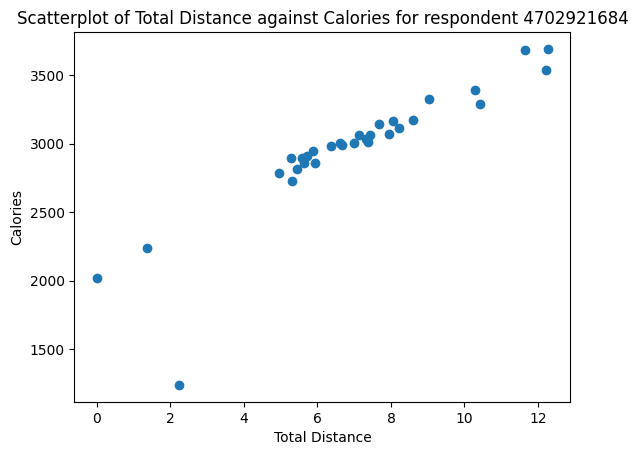

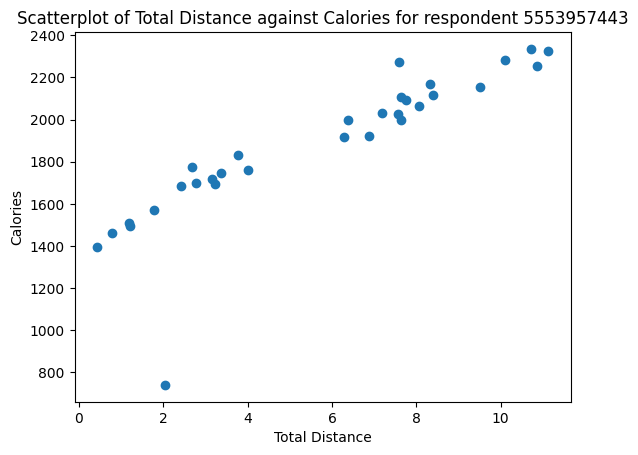

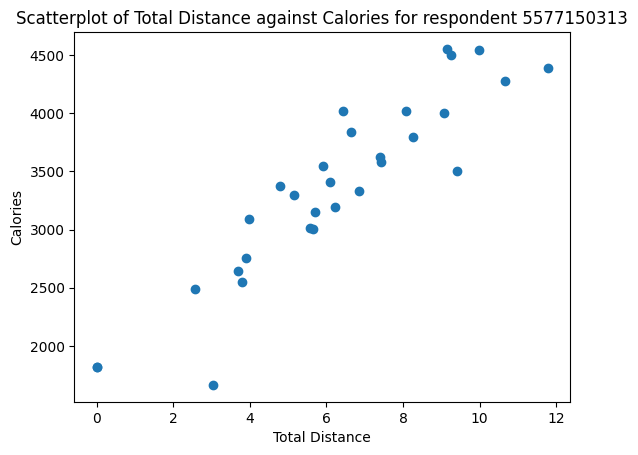

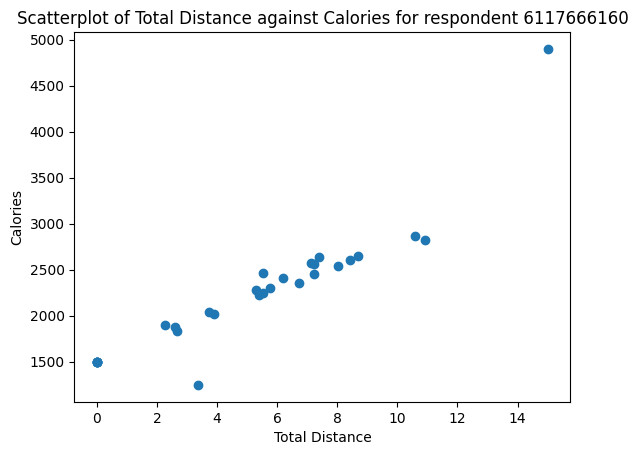

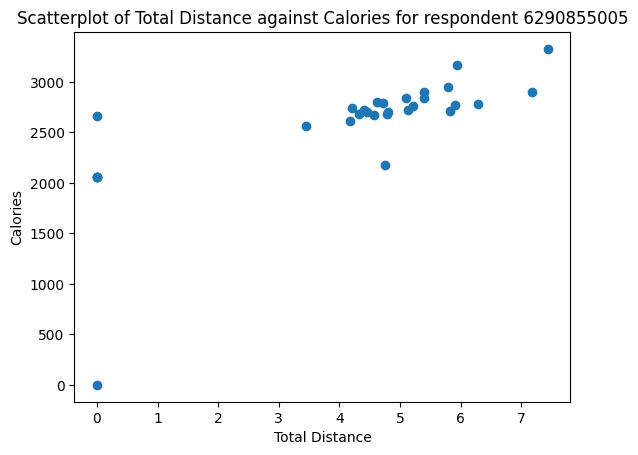

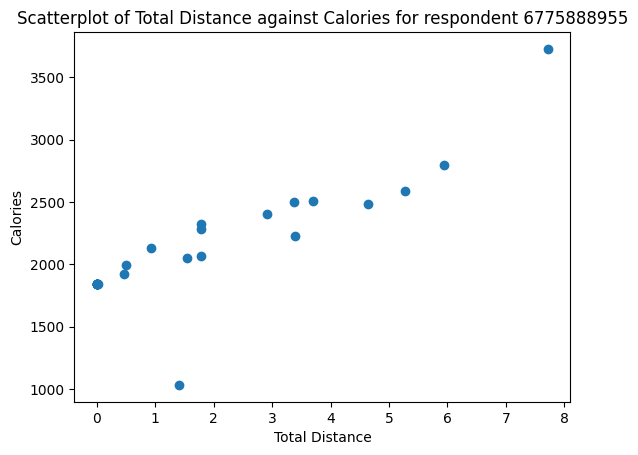

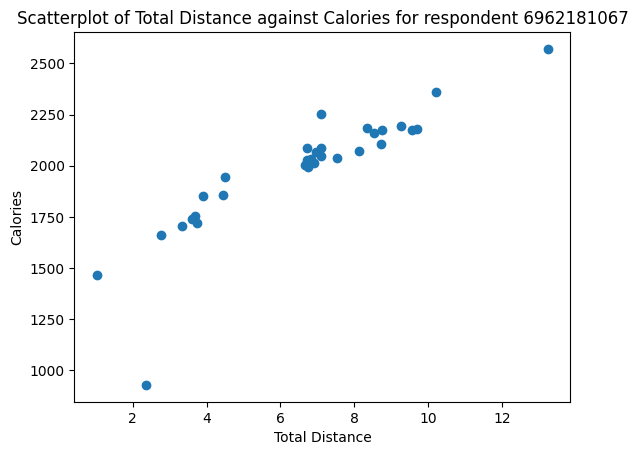

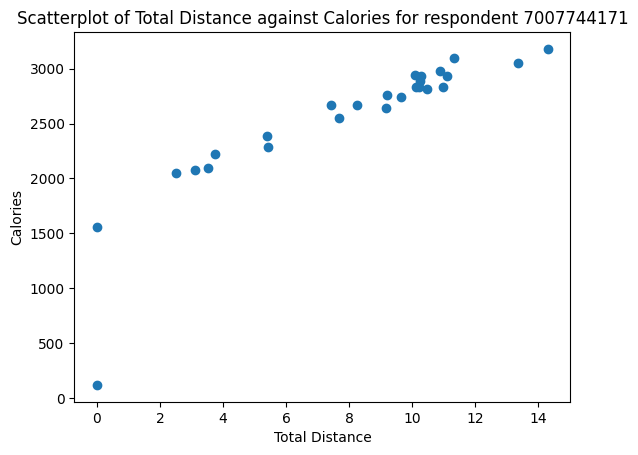

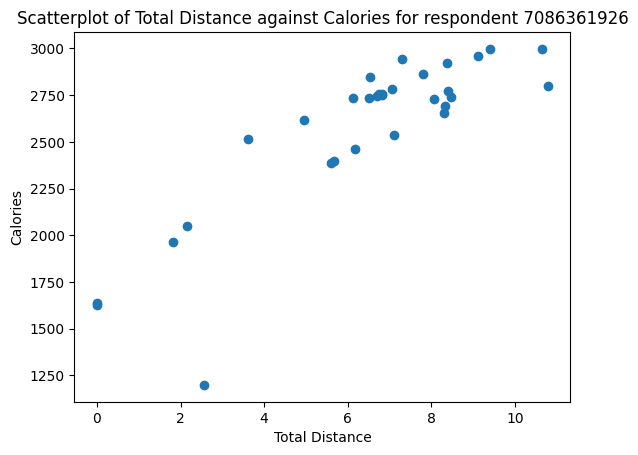

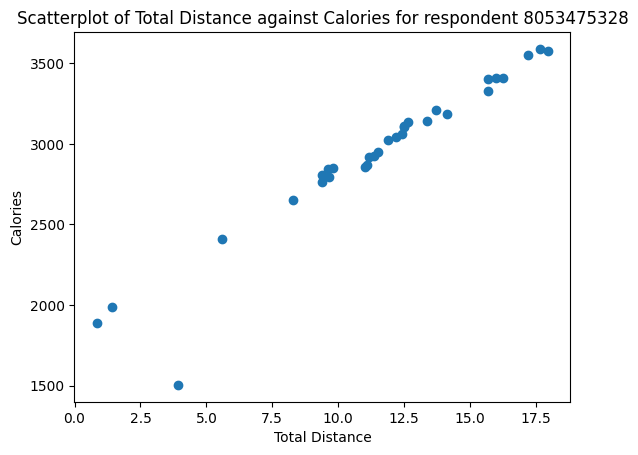

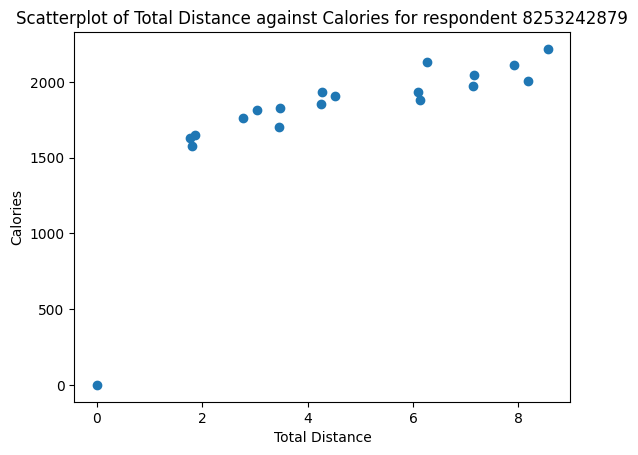

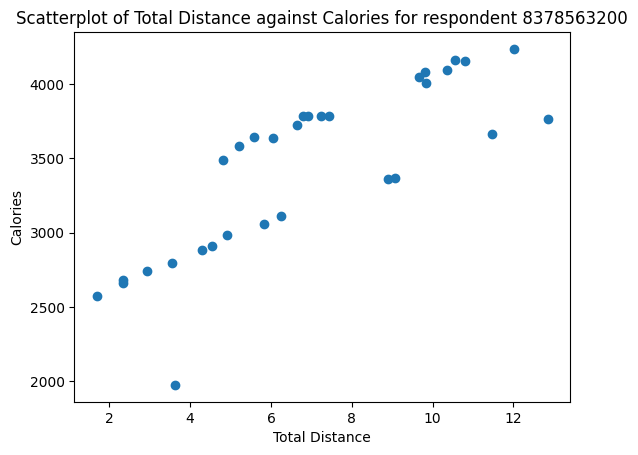

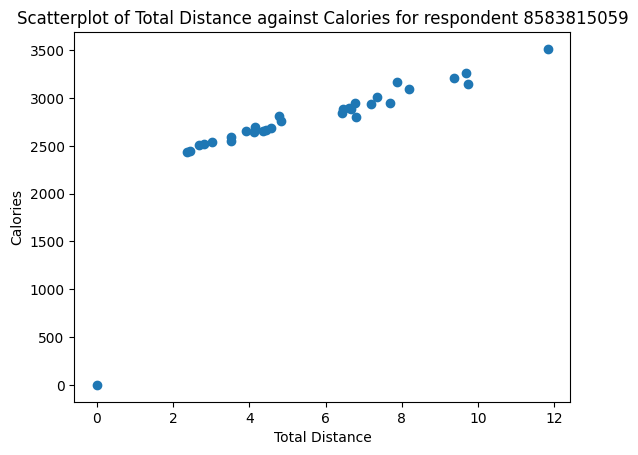

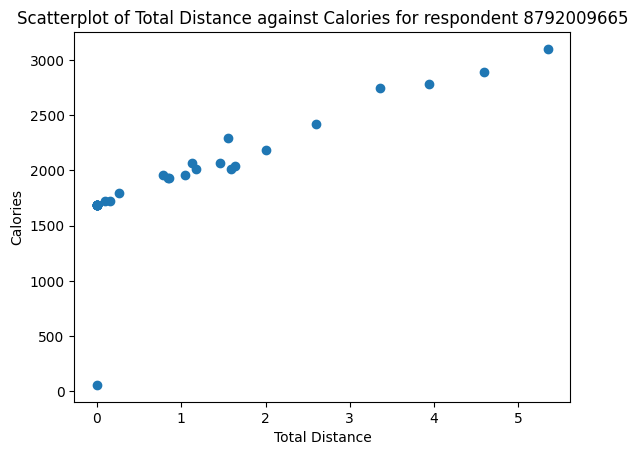

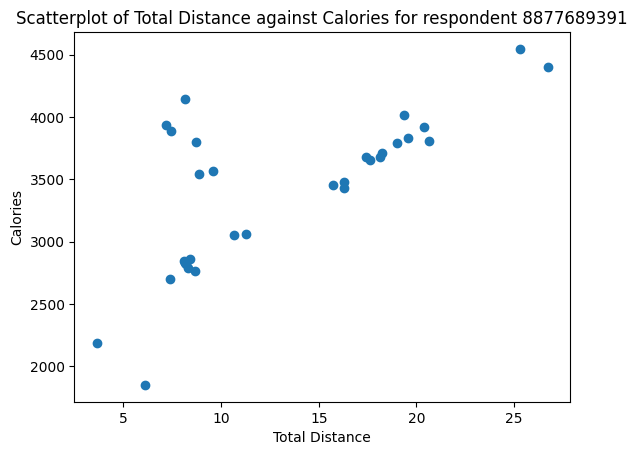

In [32]:
for i in dailyact_df['Id'].unique():
    respondent_df= dailyact_df[dailyact_df['Id']==i]
    fig= plt.scatter(x= respondent_df['TotalDistance'], y= respondent_df['Calories'])
    plt.title('Scatterplot of Total Distance against Calories for respondent {}'.format(i))
    plt.xlabel('Total Distance')
    plt.ylabel('Calories')
    plt.show()

Examinining the nature of the scatterplots above, we see that to some extent, Total Distance, and the amount of Calories burnt, have a positive relationship, and this relationship can be approximated by drawing a line of best fit.

Explore the relationship between Sedentary Minutes and Calories

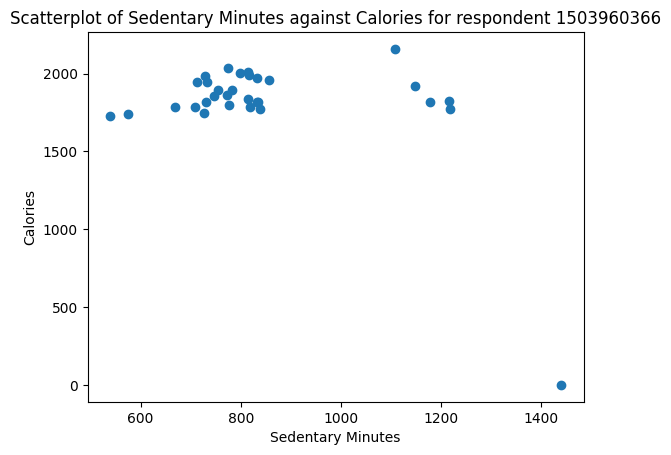

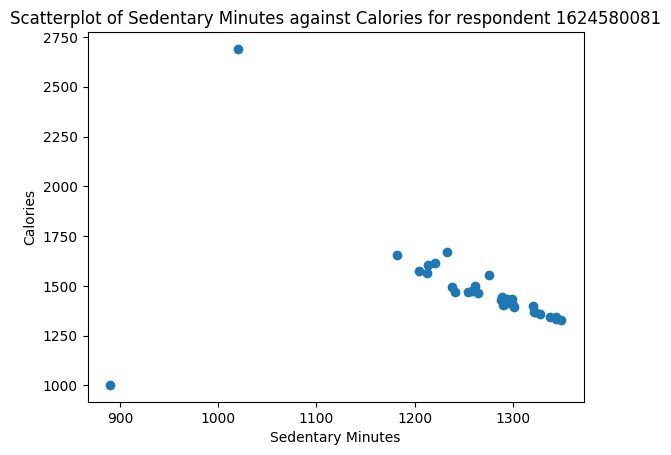

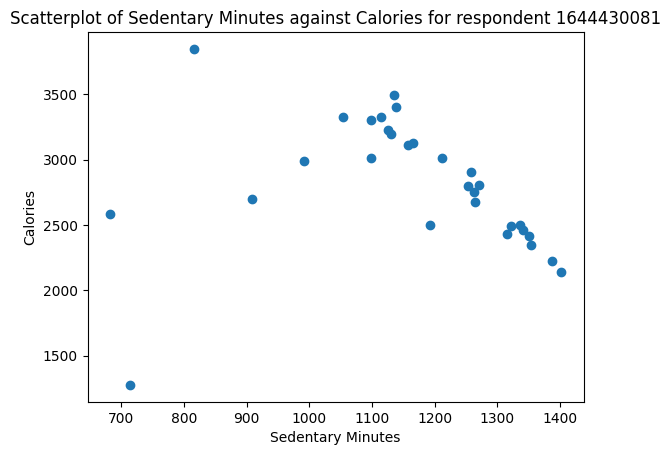

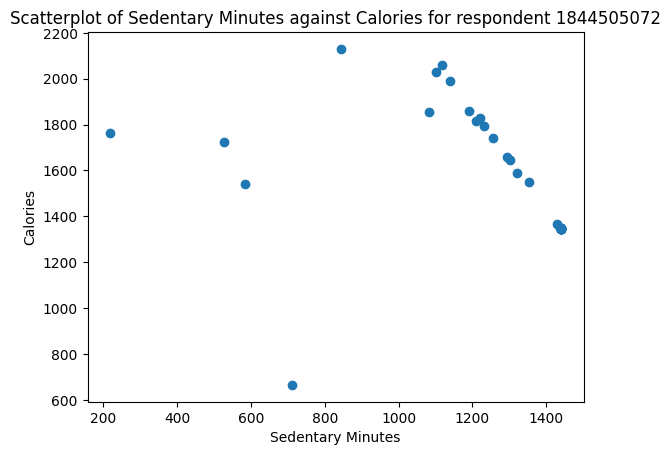

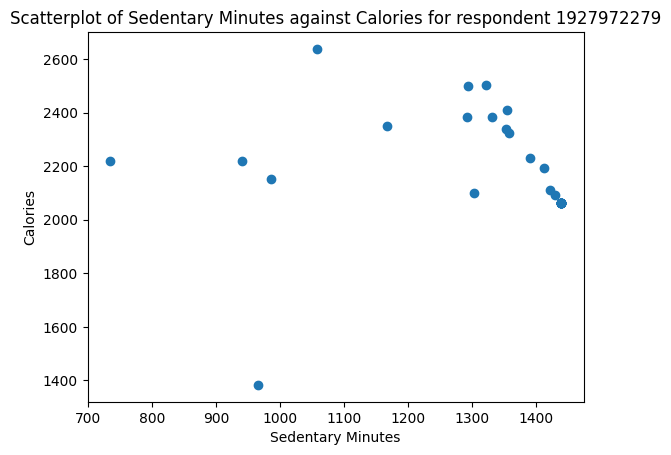

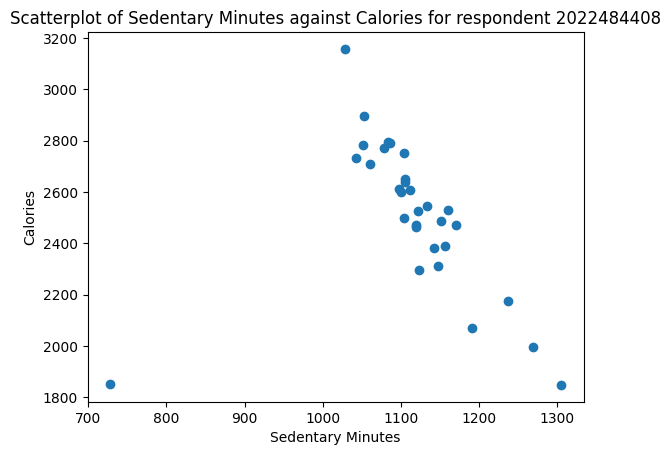

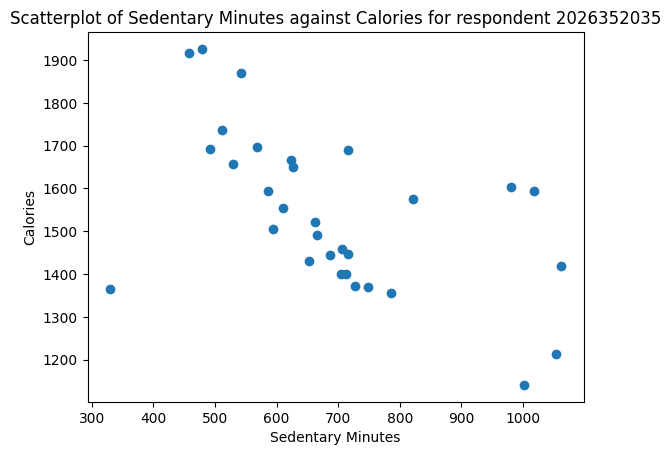

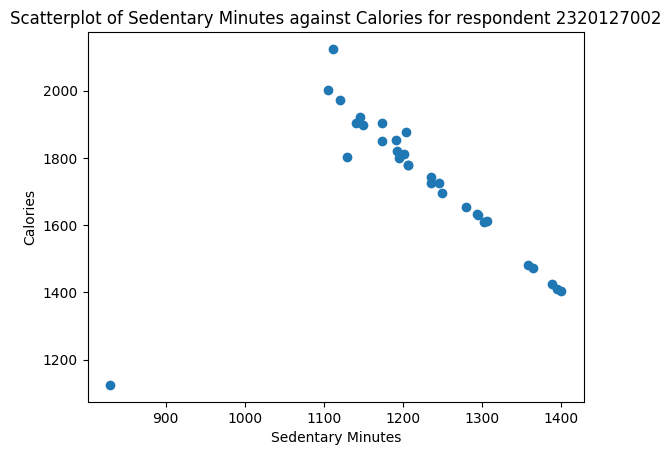

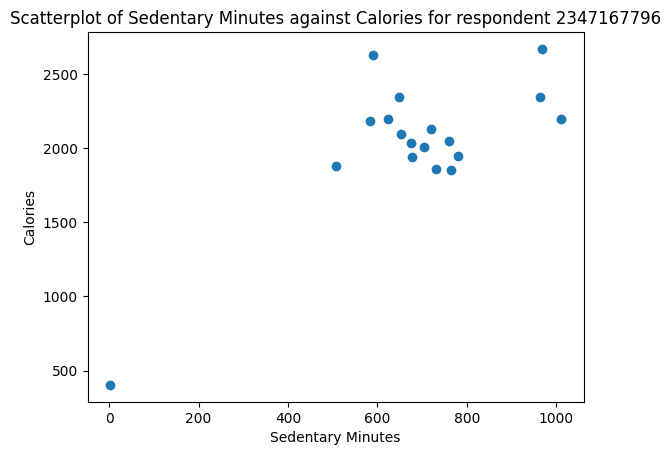

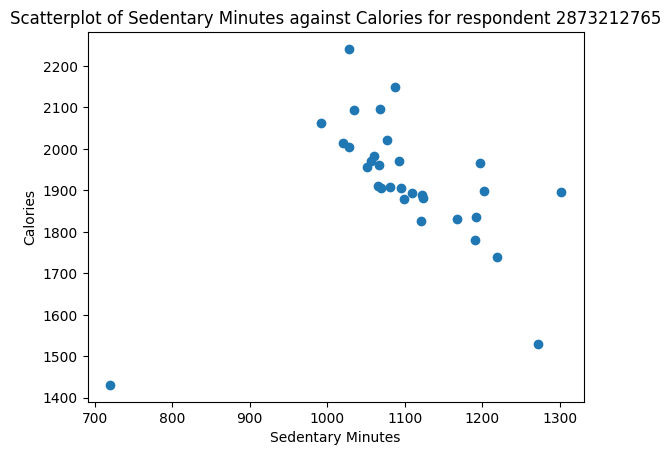

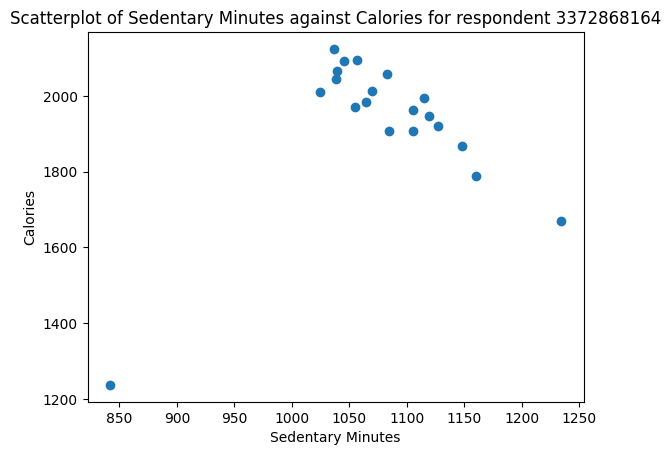

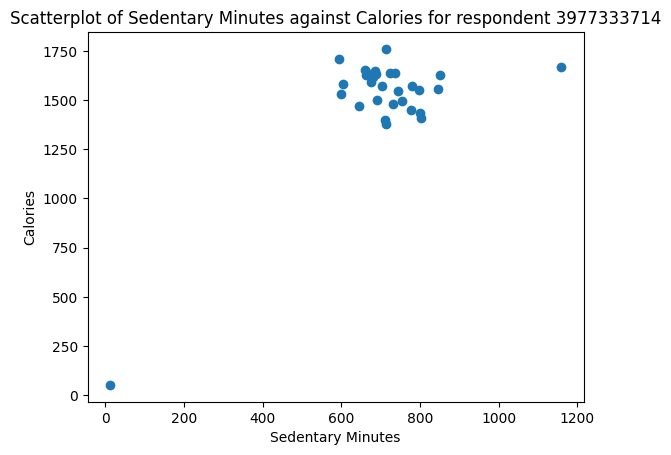

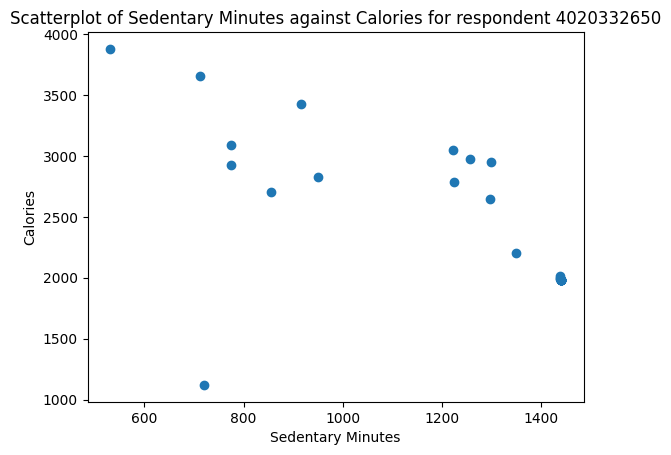

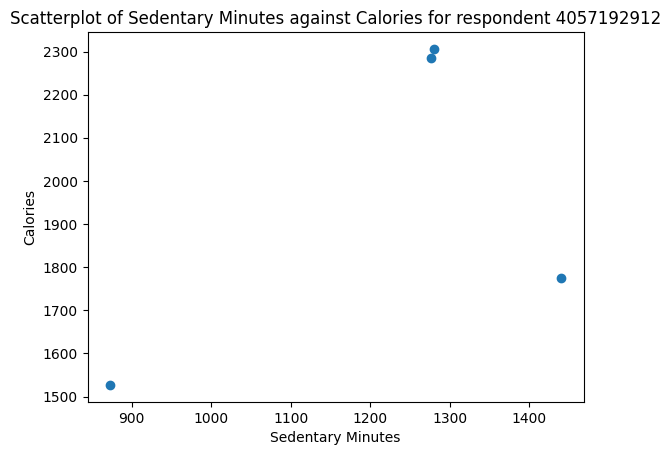

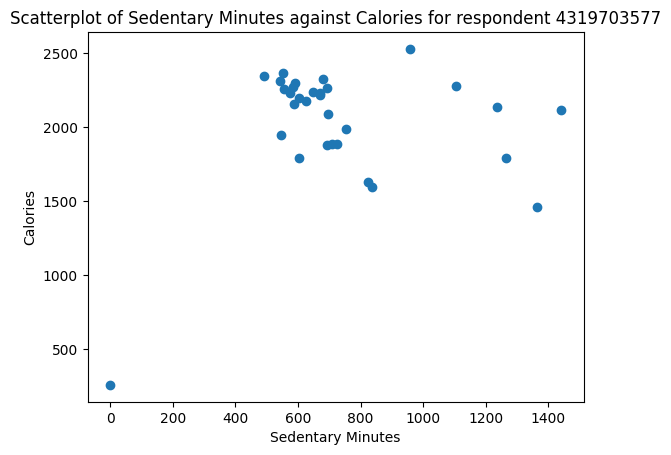

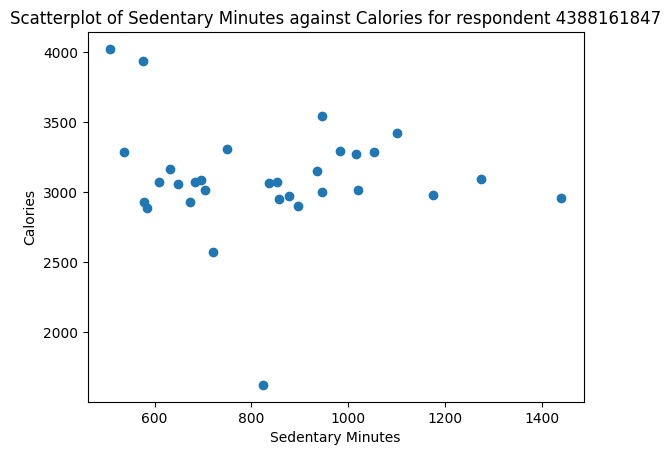

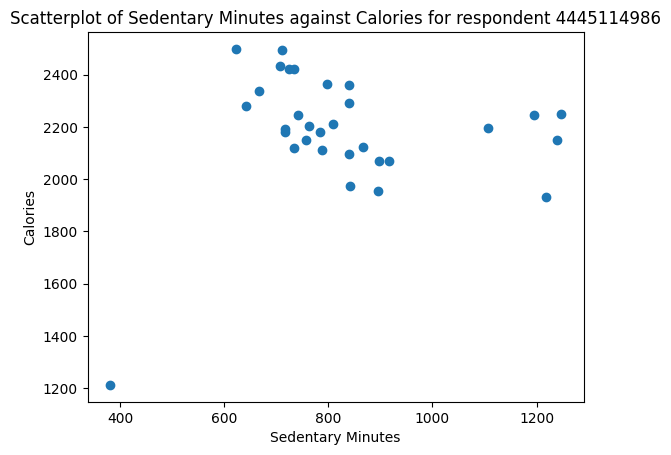

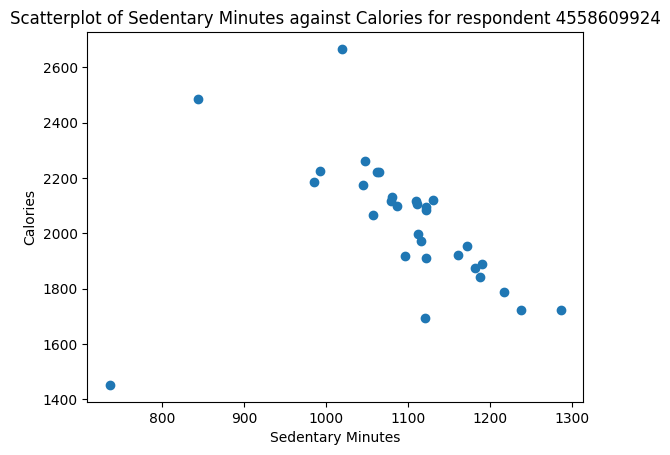

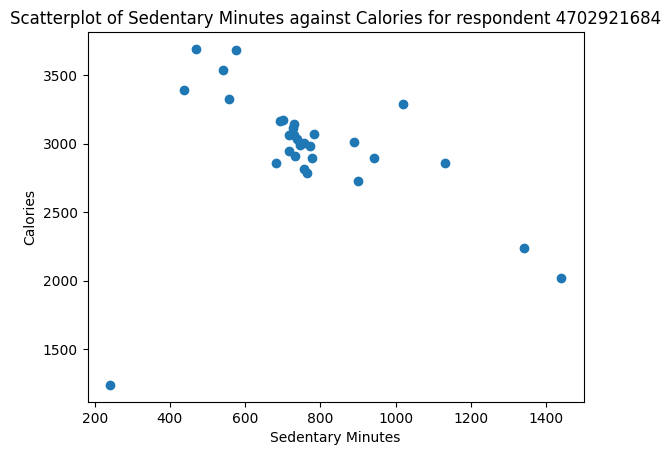

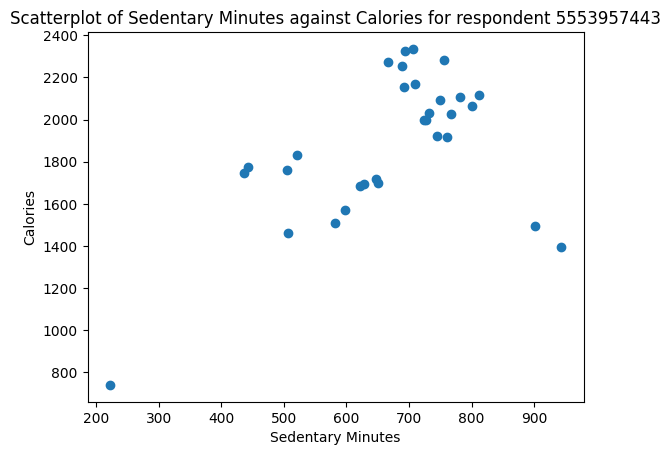

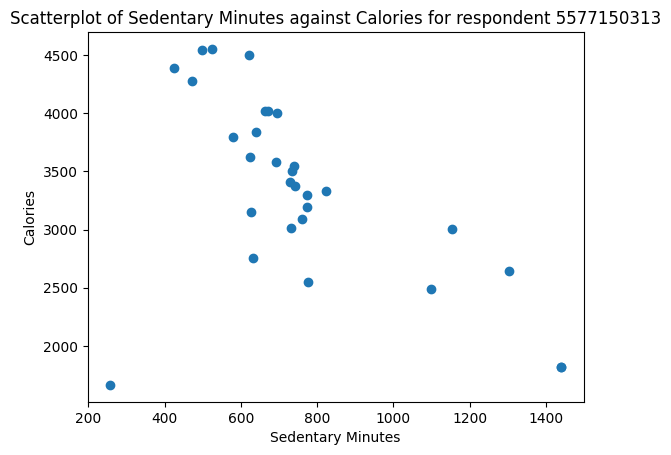

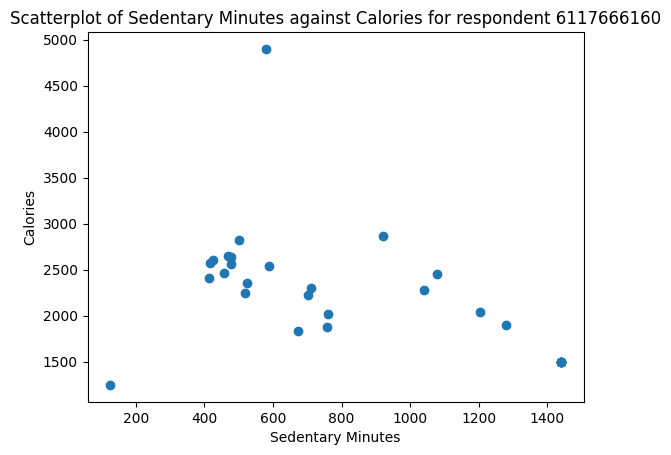

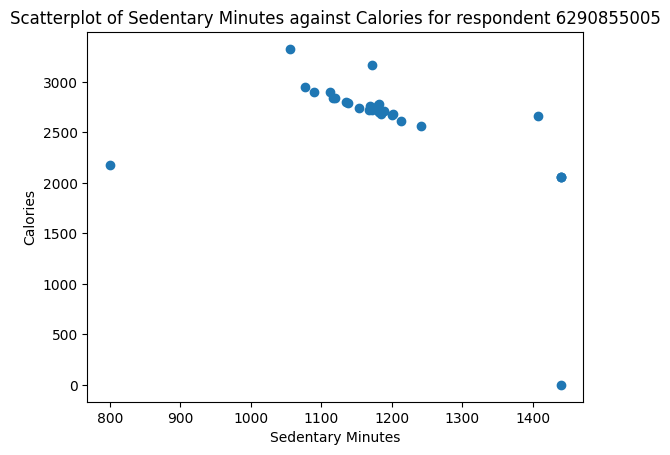

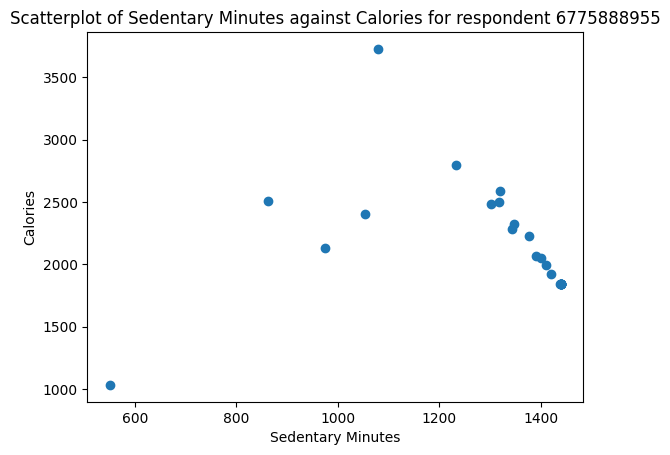

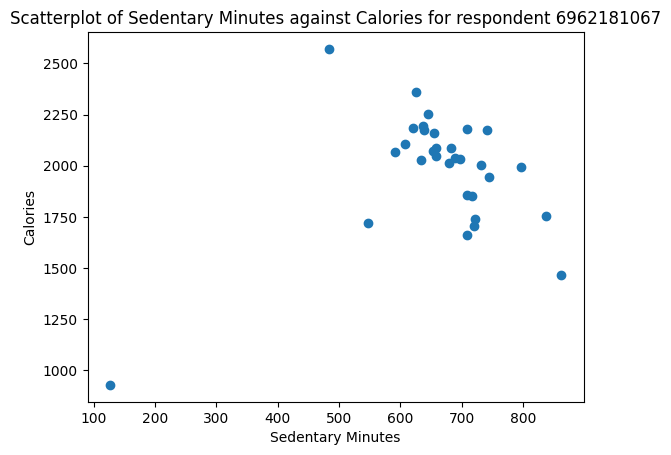

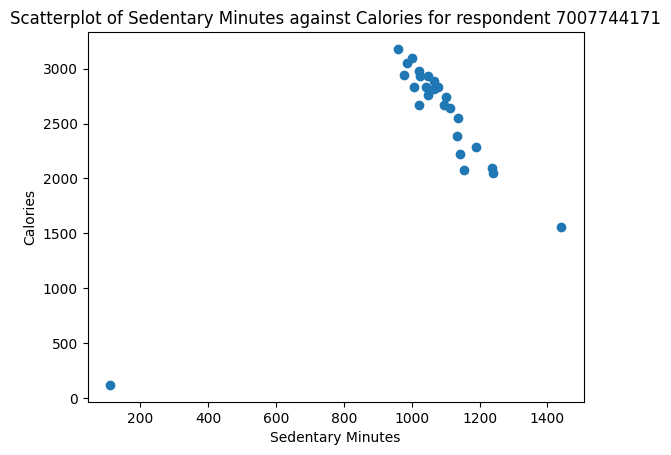

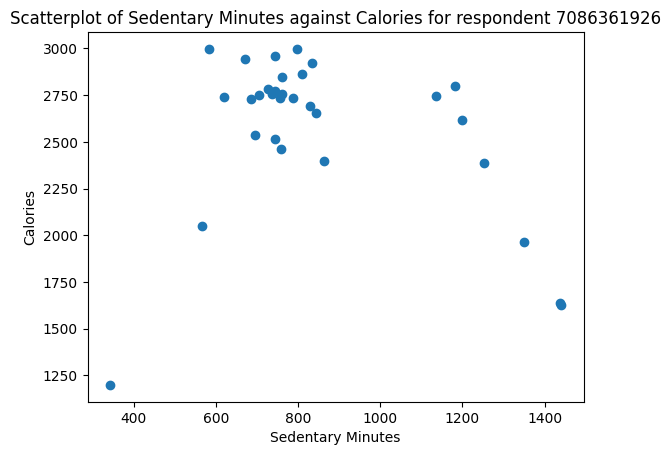

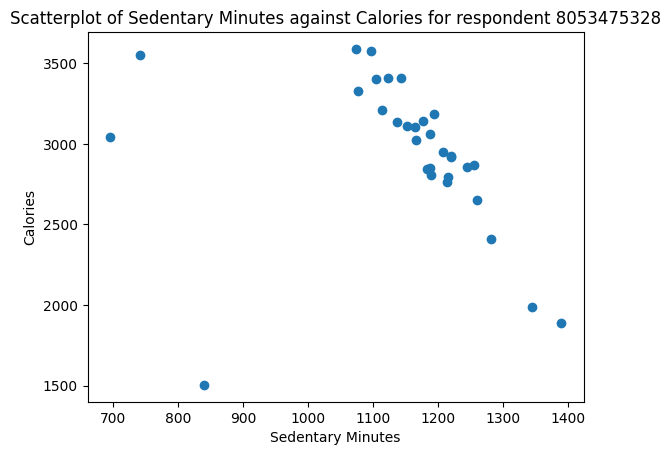

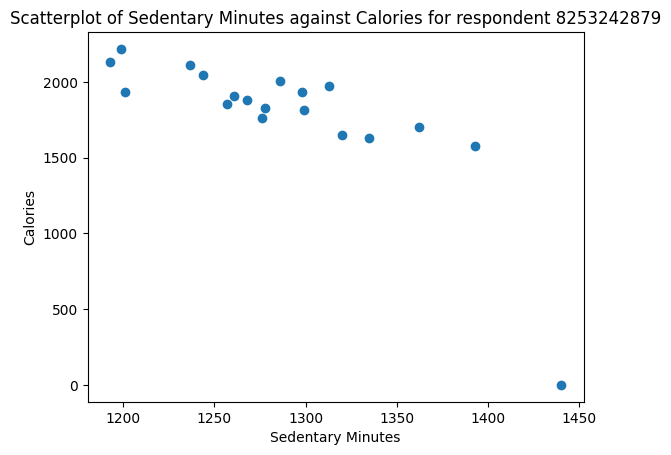

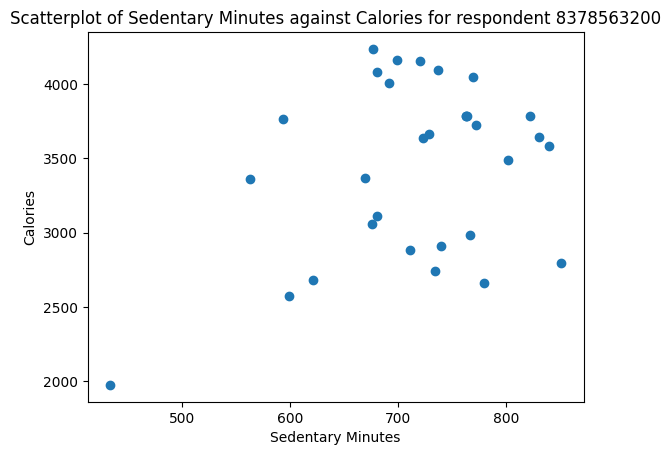

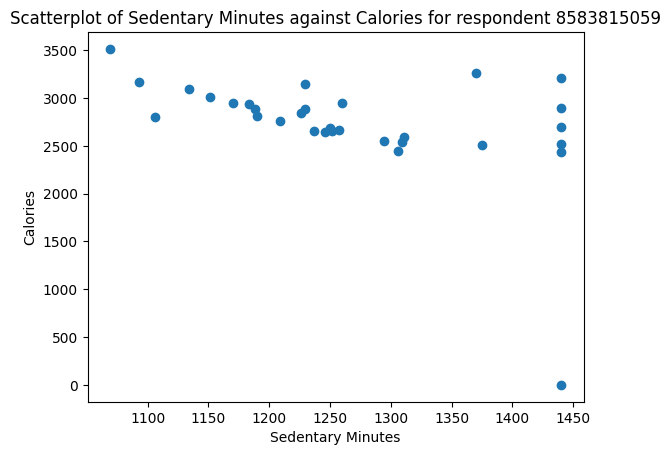

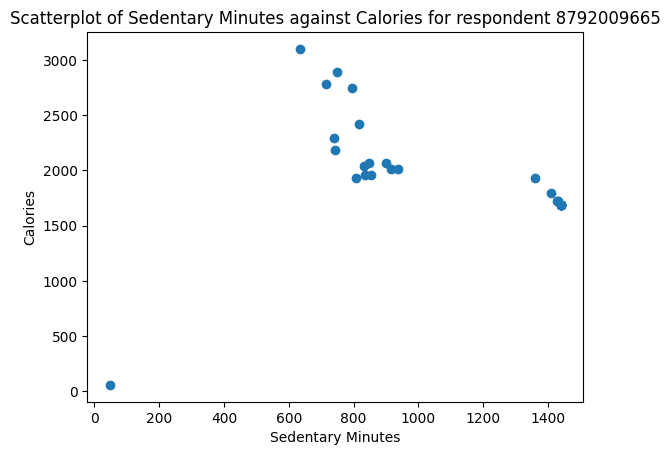

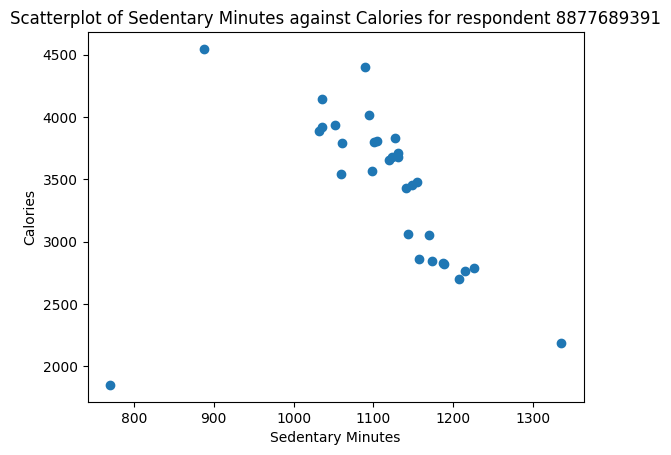

In [34]:
for i in dailyact_df['Id'].unique():
    respondent_df= dailyact_df[dailyact_df['Id']==i]
    fig= plt.scatter(x= respondent_df['SedentaryMinutes'], y= respondent_df['Calories'])
    plt.title('Scatterplot of Sedentary Minutes against Calories for respondent {}'.format(i))
    plt.xlabel('Sedentary Minutes')
    plt.ylabel('Calories')
    plt.show()

Th relationship between Sedentary minutes and amount of calories burnt is not exactly clear from this set of visualization, some are negatively related, while others are either in a cicular or horizontal, which does not stipulate any relationship.

Also, explore the relationship between steps and Calories

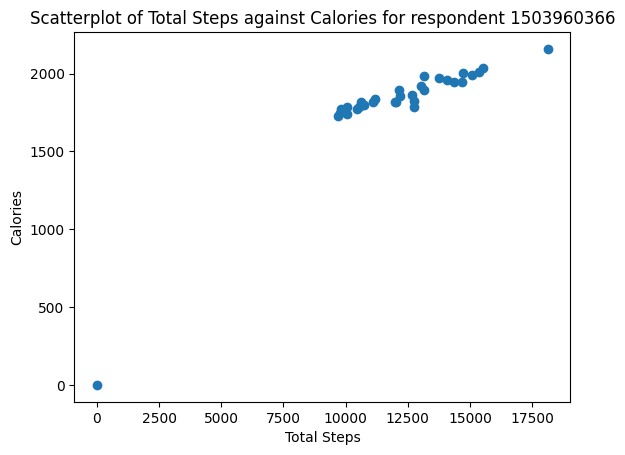

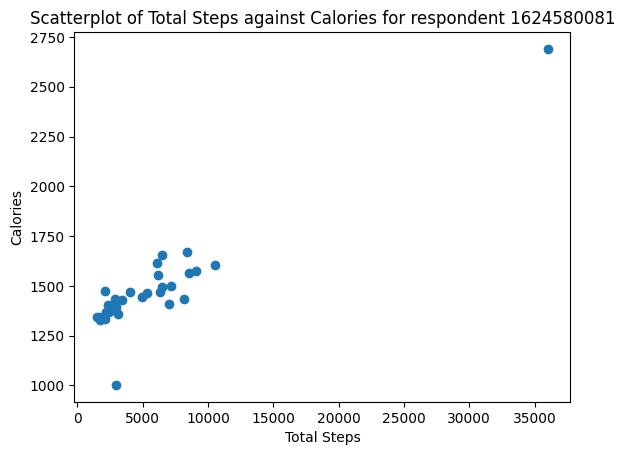

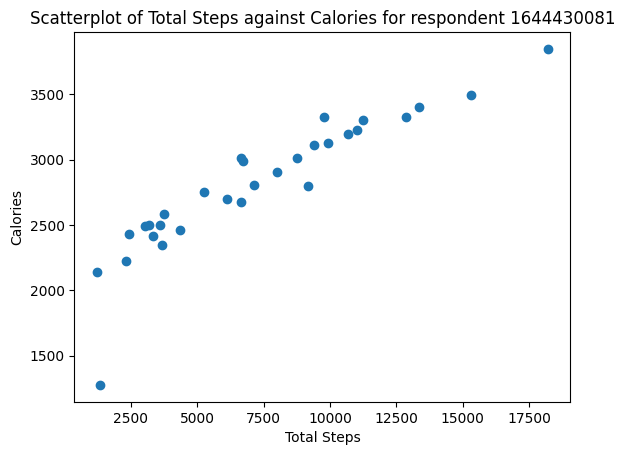

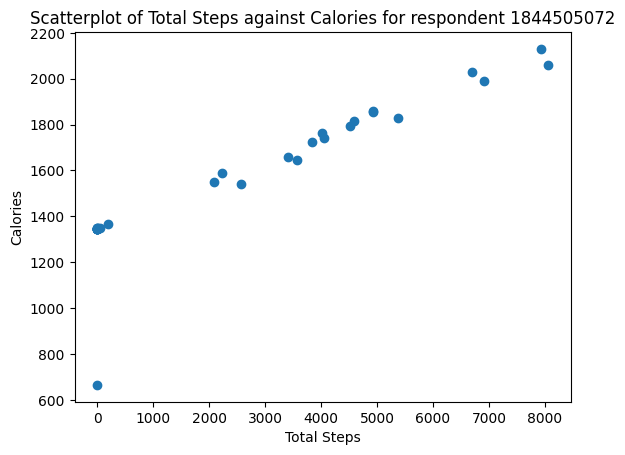

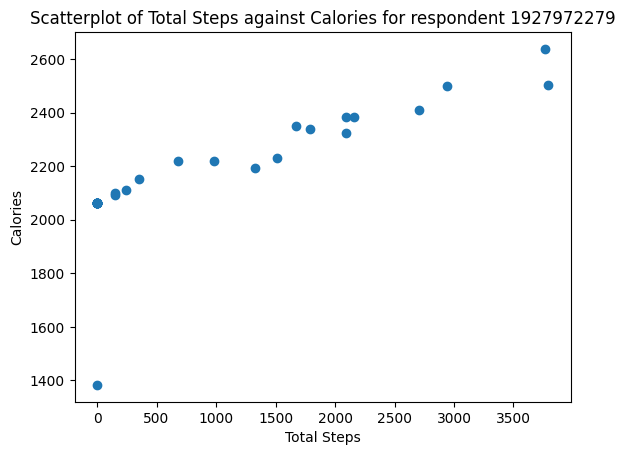

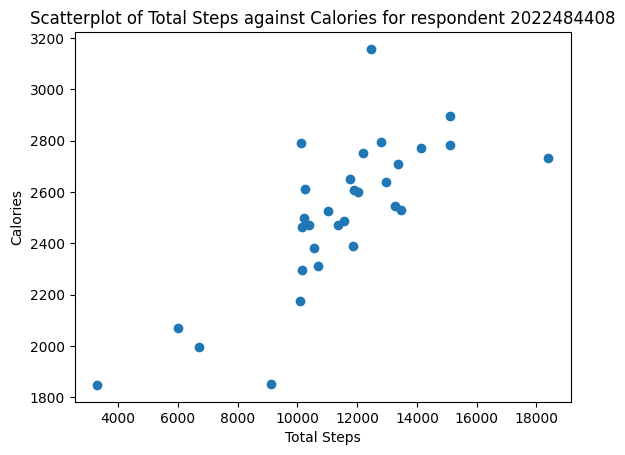

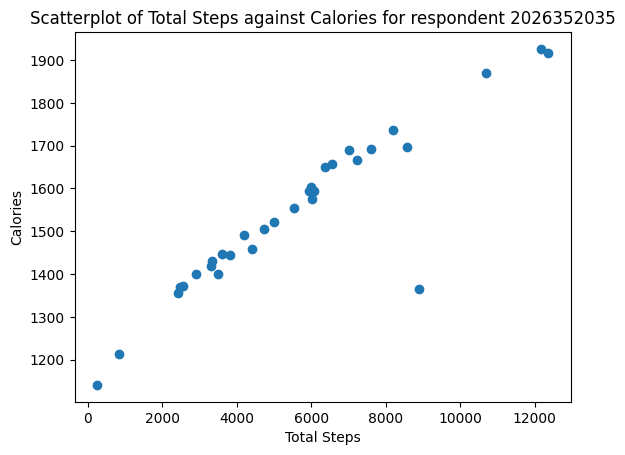

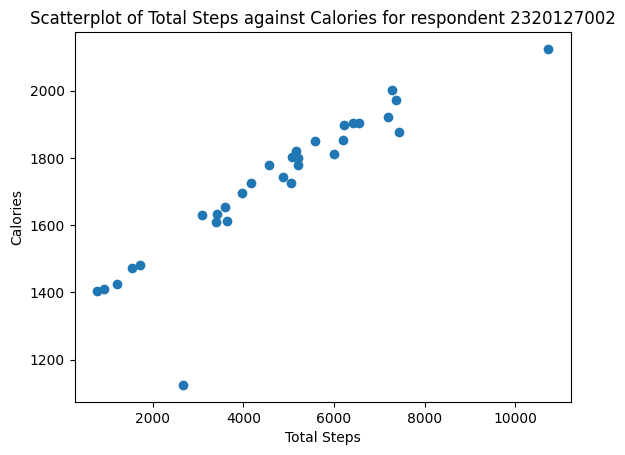

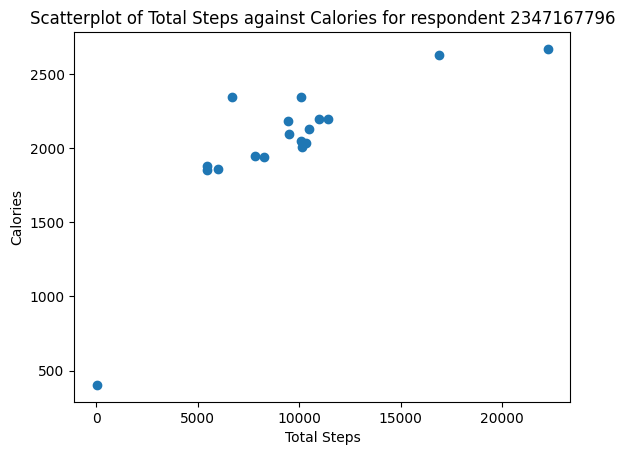

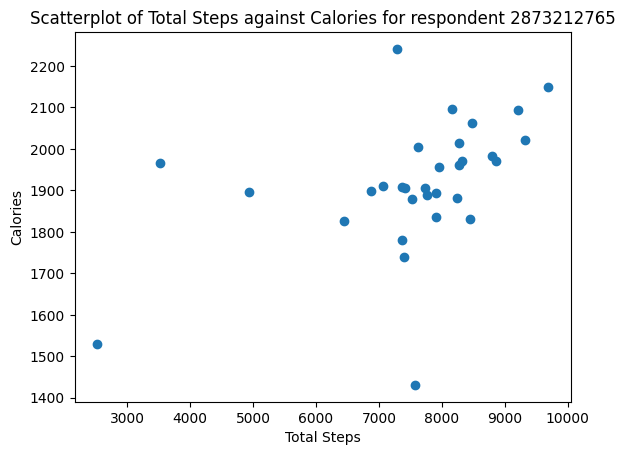

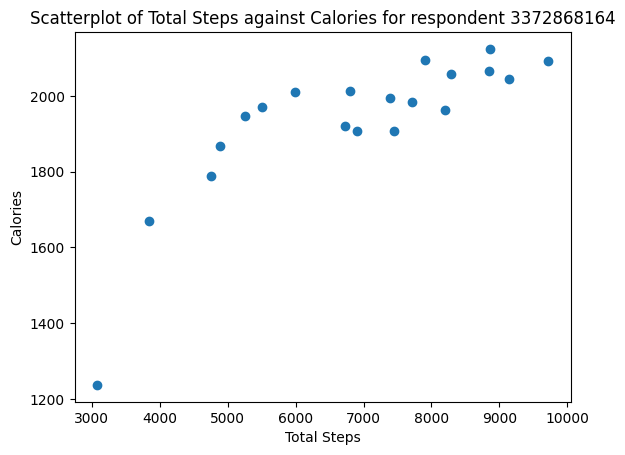

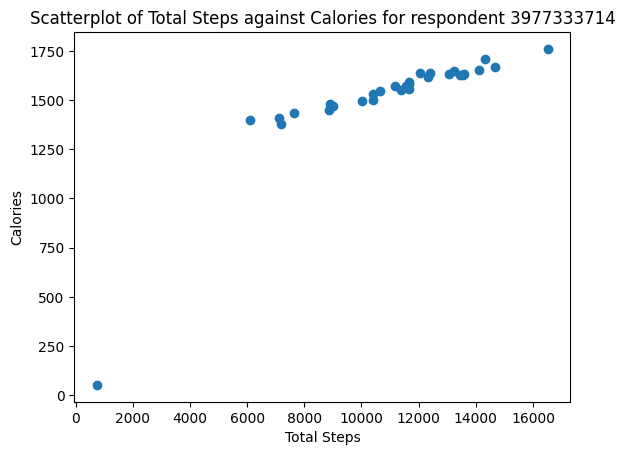

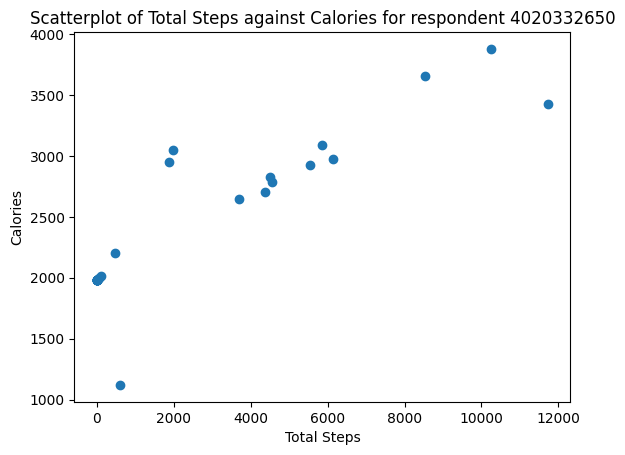

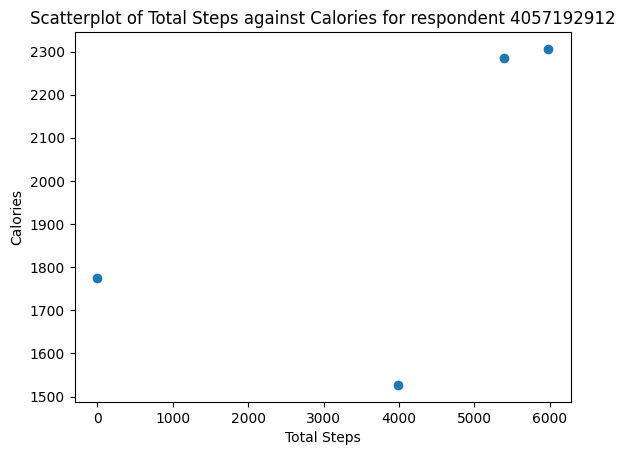

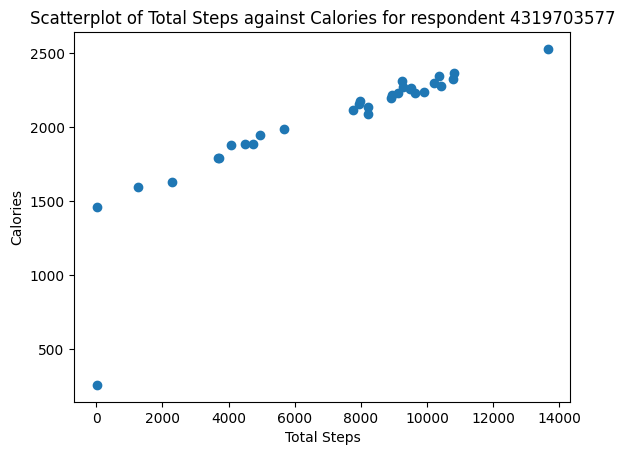

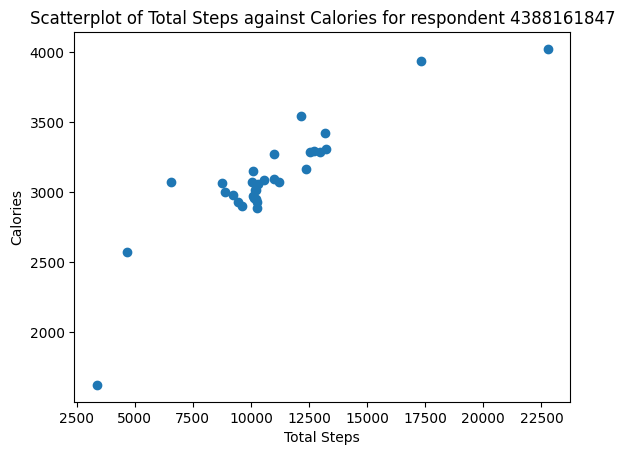

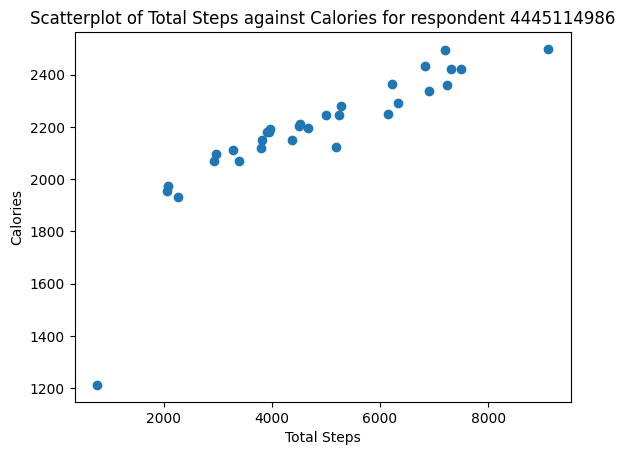

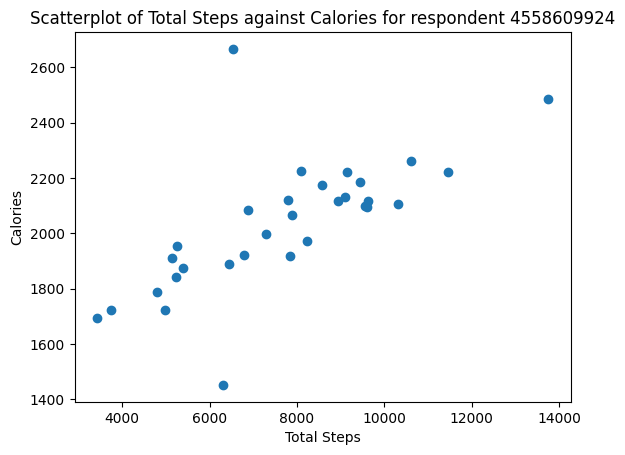

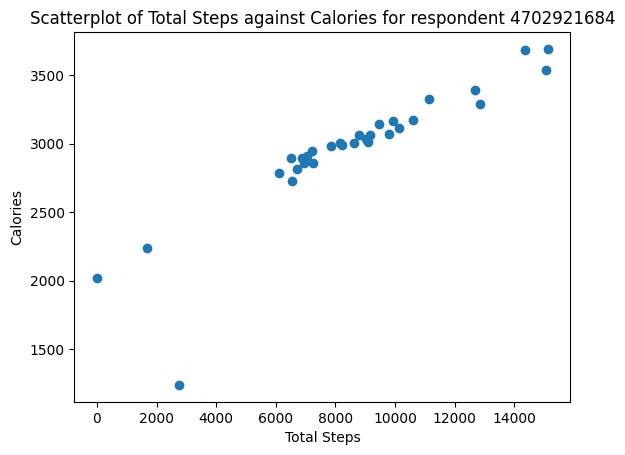

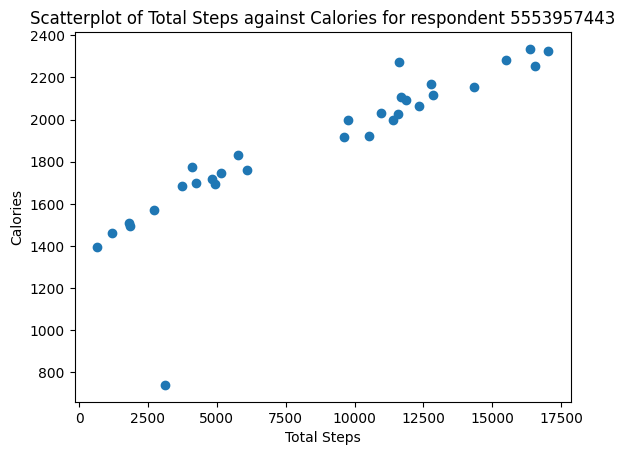

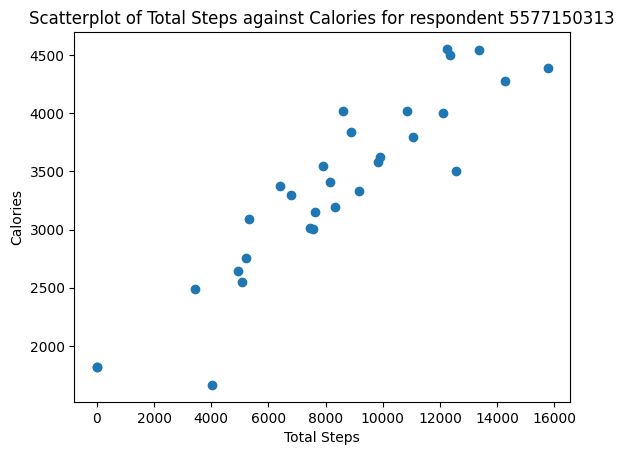

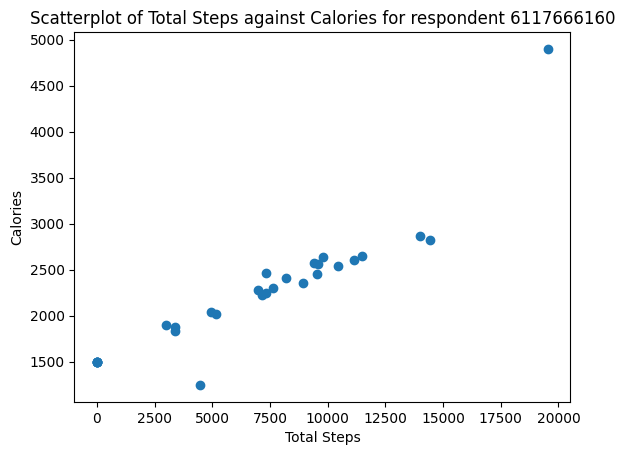

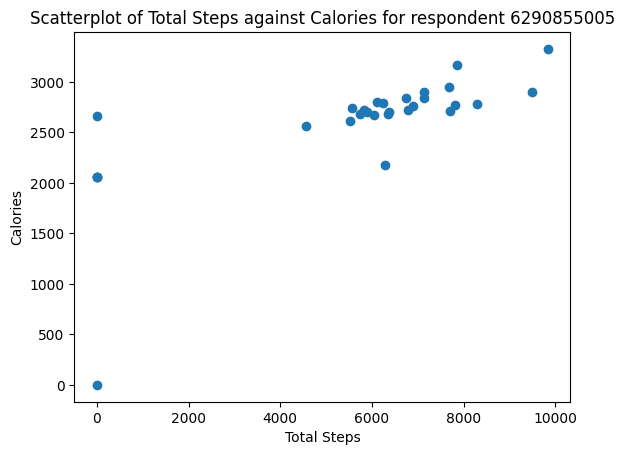

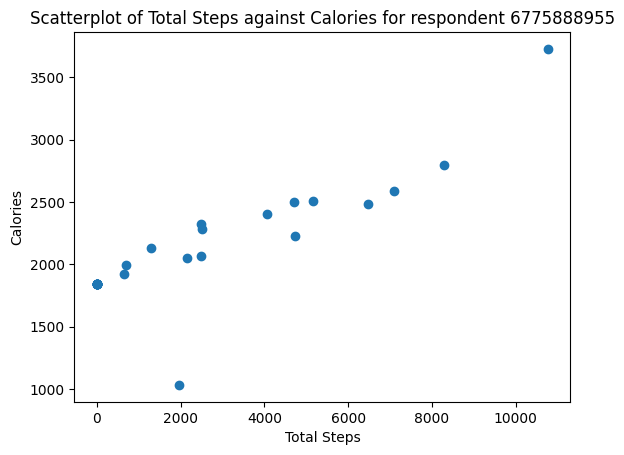

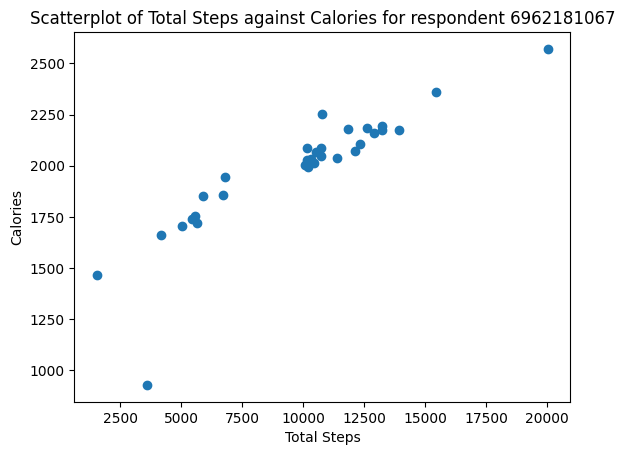

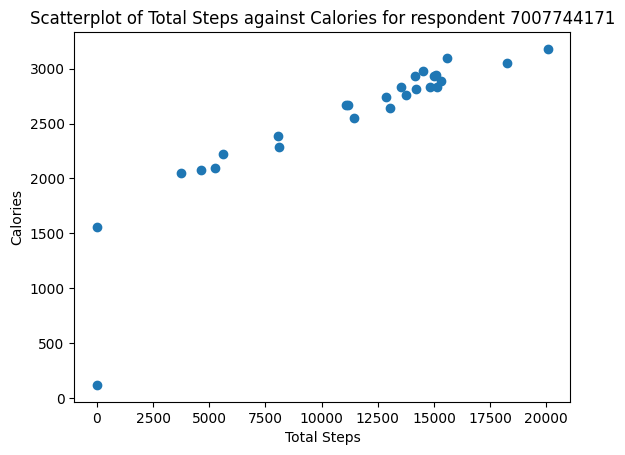

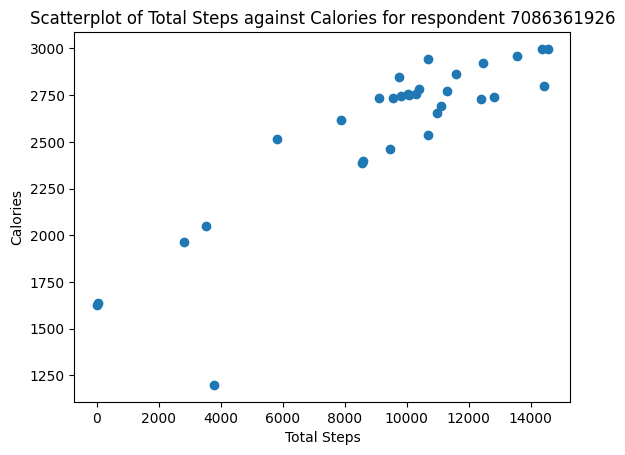

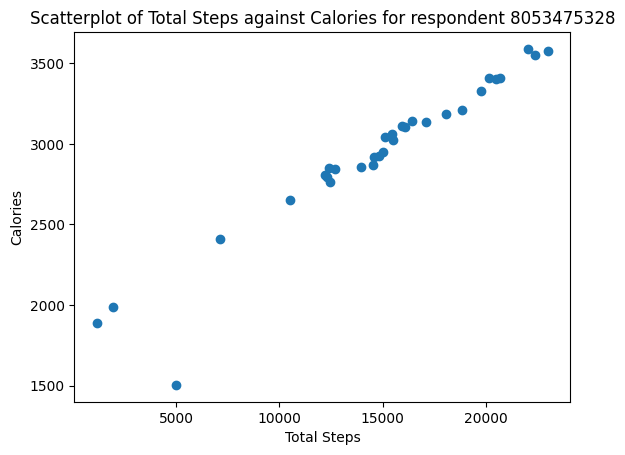

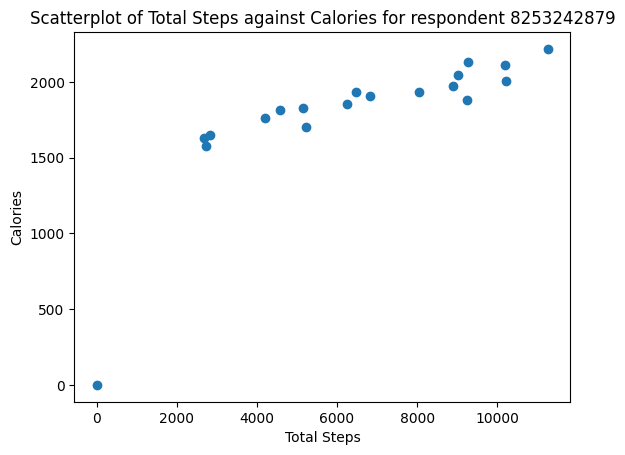

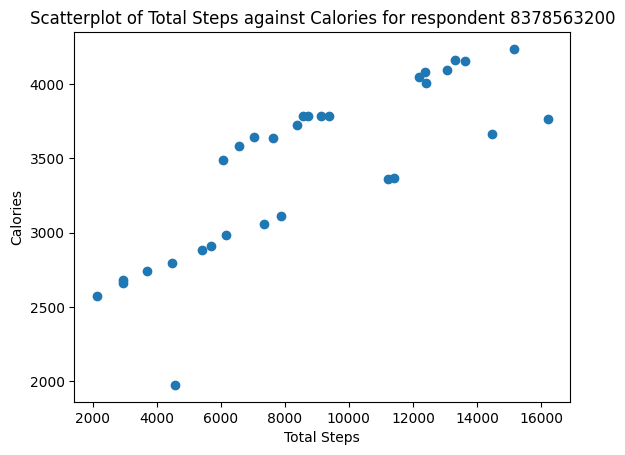

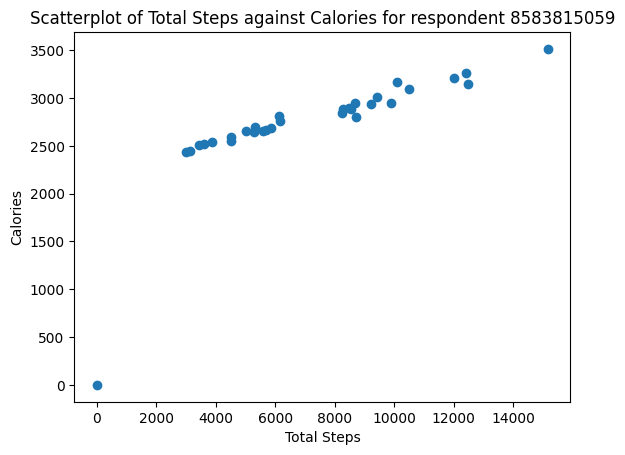

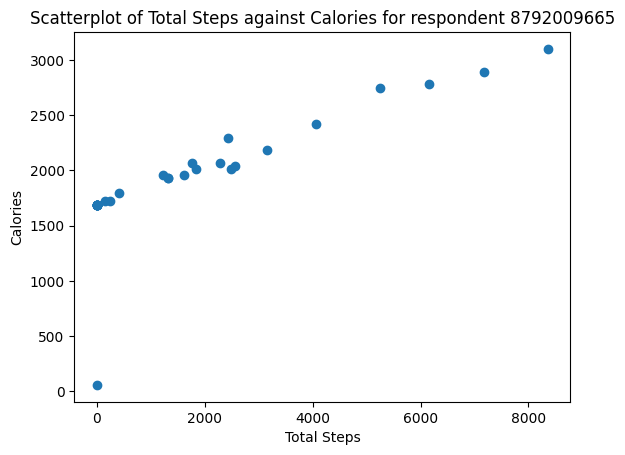

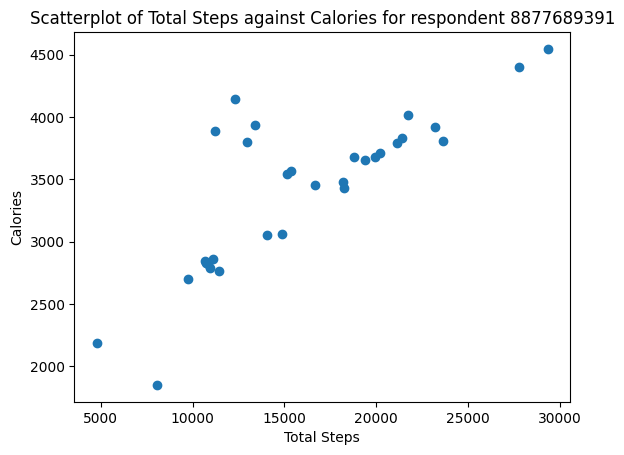

In [10]:
for i in dailyact_df['Id'].unique():
    respondent_df= dailyact_df[dailyact_df['Id']==i]
    fig= plt.scatter(x= respondent_df['TotalSteps'], y= respondent_df['Calories'])
    plt.title('Scatterplot of Total Steps against Calories for respondent {}'.format(i))
    plt.xlabel('Total Steps')
    plt.ylabel('Calories')
    plt.show()

I see that throughout the graphs, Total Steps is fairly positively related to Calories.
Even though it is obvious Knowledge that a lot of steps each day will help the patients burn calories, this method is a very good way to do explore the relationship between variables to know which variables in the dataset are correlated to  each other

Sometimes if the dataset is not too large, it is good to maybe take a glance at the whole data or majority of the data,
you can do this in python, after you've loaded the data into the datframe, or you can also do it with Microsoft Excel, which lets you view the data at once, since the data is not relatively large
This can give you some insights into certain things going on in the data. We can also gain some insights by using the describe function below
 

In [11]:
dailyact_df.describe()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [12]:
dailyact_df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

Here, I will use the corr() function to see how linearly related these variables are to each other.

In [13]:
dailyact_df[['TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].corr()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568
TotalDistance,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962
TrackerDistance,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313
LoggedActivitiesDistance,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595
VeryActiveDistance,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959
ModeratelyActiveDistance,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790
LightActiveDistance,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917
SedentaryActiveDistance,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652
VeryActiveMinutes,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838
FairlyActiveMinutes,0.498693,0.462899,0.463154,0.053860,0.211730,0.946934,0.220129,-0.022361,0.312420,1.000000,0.148820,-0.237446,0.297623


From here, I can see that TotalDistance, VeryActiveDistance, LightActiveDistance, TotalSteps, VeryActiveMinutes are the most correlated with Calories. TotalDistance and TrackerDistance are essentially the same, so I will just use one out of them
These are the features that I will use in creating my model

MODEL DEVELOPMENT

In [90]:
Z= dailyact_df[['TotalDistance','TotalSteps','LightActiveDistance','VeryActiveDistance','VeryActiveMinutes']]
y= dailyact_df['Calories']
lm= LinearRegression()

In [91]:
#Split the features Z and the target y, into train and test data sets
Z_train, Z_test, y_train, y_test= train_test_split(Z,y, test_size= 0.25, random_state= 42)


In [84]:
# Fit the train_data on the Linear Regression object lm
lm.fit(Z_train, y_train)

LinearRegression()

In [85]:
# Predict using the model created
y_pred= lm.predict(Z_test)

In [86]:
# find the R2 score or the coefficient of determination
R2= r2_score(y_test, y_pred)
print(R2)

0.6952463270569667


In [100]:
# Find the mean squared error
mse= mean_squared_error(y_test,y_pred)
print(mse)

167489.05339996482


I want to see if building a model using Neural Networks will give me a better R2 value and mean squared error value 

In [94]:
model=models.Sequential()
model.add(layers.Dense(5, input_shape=(Z_train.shape[1],))),
model.add(layers.Dense(32, activation='linear')),
model.add(layers.Dense(64, activation='linear')),
model.add(layers.Dropout(0.4)),
model.add(layers.Dense(64, activation='linear')),
model.add(layers.Dropout(0.4)),
model.add(layers.Dense(1,activation='linear'))
          
model.compile(optimizer='adam', loss= 'mean_squared_error',metrics= ["mean_absolute_error","mean_squared_error"])



In [95]:
model.fit(Z_train, y_train, epochs=20, batch_size=32, validation_data=(None))

Epoch 1/20
22/22 [==============================] - 3s 7ms/step - loss: 6641761.5000 - mean_absolute_error: 1961.4678 - mean_squared_error: 6641761.5000
Epoch 2/20
22/22 [==============================] - 0s 9ms/step - loss: 3204354.5000 - mean_absolute_error: 1416.7330 - mean_squared_error: 3204354.5000
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 2436778.7500 - mean_absolute_error: 1276.7457 - mean_squared_error: 2436778.7500
Epoch 4/20
22/22 [==============================] - 0s 12ms/step - loss: 1863573.0000 - mean_absolute_error: 1142.3462 - mean_squared_error: 1863573.0000
Epoch 5/20
22/22 [==============================] - 0s 8ms/step - loss: 1678506.1250 - mean_absolute_error: 1070.7028 - mean_squared_error: 1678506.1250
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 1573450.3750 - mean_absolute_error: 1052.1084 - mean_squared_error: 1573450.3750
Epoch 7/20
22/22 [==============================] - 0s 9ms/step - loss: 1604203.0

In [96]:
prediction= model.predict(Z_test)

8/8 [==============================] - 1s 5ms/step


In [99]:
m= model.evaluate(Z_test, y_test)
m

8/8 [==============================] - 0s 8ms/step - loss: 1277910.6250 - mean_absolute_error: 962.3708 - mean_squared_error: 1277910.6250


[1277910.625, 962.370849609375, 1277910.625]

In [98]:
R2_nn= r2_score(y_test, prediction)
print(R2_nn)

-1.325214117713878


In [101]:
data= [['Linear Regression from sklearn', mse, R2],['Neural Network using Tensorflow', m[2], R2_nn]]
pred_models= pd.DataFrame(data, columns=['Model', 'mean squared error', 'r2score'])
pred_models

,Model,mean squared error,r2score
0,Linear Regression from sklearn,1.674891e+05,0.695246
1,Neural Network using Tensorflow,1.277911e+06,-1.325214


So, LinearRegression is the better model in this case

This model created can be optimized and used, as a suggestive feature in the bellabeat app. For example, patients who want to lose weight or burn calories, can have an idea of the amount of calories they will burn by taking a certain number of steps, walking for a particular distance, engaging in Light activity for a certain distance, being very active for a certain distance, and lastly, being very active for a particular amount of minutes. 